# Scooter Sharing Analysis

**Project Objective:**

The primary goal of this project is to analyze data from GoFast, an e-scooter sharing service, and test several hypotheses:

1. Do subscribed users spend more time riding? We will measure this by comparing the average riding time of subscribed users to non-subscribed users. If confirmed, this could suggest that users with subscriptions are more profitable for the company.
2. Can we assert that the average distance traveled by users with a subscription in one trip does not exceed an optimal threshold in terms of scooter wear and tear? We will define and assess this threshold.
3. Will the monthly revenue from users with a subscription exceed the revenue from users without a subscription? We will conduct a comparative analysis to determine the financial impact of subscriptions.
4. What is the minimum number of promotional codes that must be distributed to ensure a roughly 5% chance of not meeting the marketing department's plan? We will employ statistical methods to calculate this number while maintaining a 5% risk level.
5. Can we estimate the probability that notifications will be opened by no more than a specified number of users? We will model the likelihood of notification open rates based on user thresholds.

**Data Source:**

This project relies on three datasets obtained from GoFast, encompassing user information, ride history, and subscription data. We will perform data cleaning and preprocessing as needed to ensure data quality and relevance.

**Expected Outcomes:**

Through this analysis, we aim to provide actionable insights for GoFast. We anticipate revealing patterns related to user subscriptions, ride optimization, revenue generation, marketing effectiveness, and user engagement.

**Tools and libraries:**
- Python
- Pandas
- Matplotlib
- Numpy

# Исследование данных сервиса аренды самокатов

**Аннотация проекта** 

На данных сервиса аренды самокатов GoFast проведём исследование, результаты которого будут учтены при реализации дальнейших стратегий развития бизнеса. В частности, расширение аудотории пользователей с подпиской.

**Цель исследования** — проанализировать данные и оценить следующие предположения:
1) Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

2) Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимального значения с точки зрения износа самоката?

3) Будет ли помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки?

4) Какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план отдела маркетинга была примерно 5 %?

5) Оценить вероятность того, что уведомление откроют не более заявленного числа пользователей.

**Ход исследования**
1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.

**Описание данных**

Датасет представлен тремя разными файлами с информацией о пользователях, их поездках и подписках сервиса аренды самокатов GoFast.

**Инструменты и библиотеки:**
- Python
- Pandas
- Matplotlib
- Numpy

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom, poisson, norm
from math import sqrt, factorial

In [2]:
# установим настройки для отображения всех столбцов датафрейма
pd.set_option('display.max_columns', None)

#### Шаг 1. Загрузка данных

Датафрейм представлен тремя разными файлами:
1. Пользователи 
2. Поездки
3. Подписки

Создадим функции, чтобы нивелировать повторяющиеся действия при выводе основной информации и проверке данных на дубликаты и пустые значения.

In [3]:
# определим функцию data_info() для вывода основной информации
def data_info(data):
    data.info()
    display(data.head())

In [4]:
# определим функцию data_isnull_isdup() для проверки на дубликаты и пустые значения
def data_isnull_isdup(data):
    print('Количество явных дубликатов:', data.duplicated().sum())
    print('Количество пропусков:')
    print(data.isnull().sum())

In [6]:
# считываем данные из csv-файлов и сохраняем в соответствующие датафреймы
df_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
df_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
df_subs = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

Изучим общую информацию о каждом датафрейме.

**Информация о пользователях**

In [7]:
# вызовем функцию data_info()
data_info(df_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Итак, в таблице 5 столбцов, 2 из которых имеют числовой тип данных. 

**Информация о поездках**

In [8]:
# вызовем функцию data_info()
data_info(df_rides)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Датафрейм содержит 4 столбца, на первый взгляд с числовыми значениями. Однако `date` имеет тип object.

**Информация о подписках**

In [9]:
# вызовем функцию data_info()
data_info(df_subs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Датафрейм включает один столбец с типами подписки и три столбца со стоимостью услуг в зависимости от типа подписки.

**Вывод:** 

Основываясь на предварительном обзоре датафрейма отметим следующее:
- Объёма данных достаточно для проверки гипотез исследования.
- При этом количество значений в столбцах не различается. Значит, в данных нет пропущенные значений. 
- Названия столбцов не отличаются по стилю и соответствуют единообразию.
- Столбец `date` необходимо привести к типу даты для исключения возможных ошибок при анализе.

#### Шаг 2. Предобработка данных

**Датасет — пользователи**

In [10]:
# вызовем функцию data_isnull_isdup() и определим в каких столбцах есть пропуски и дубликаты 
data_isnull_isdup(df_users)

Количество явных дубликатов: 31
Количество пропусков:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


В столбцах не обнаружено пропущенных значений. Вместе с тем есть явные дубликаты, от которых следует избавиться.

In [11]:
# избавимся от явных дубликатов при помощи метода drop_duplicates()
df_users = df_users.drop_duplicates()
print('Количество явных дубликатов:', df_users.duplicated().sum())

Количество явных дубликатов: 0


Далее проверим наличие неявных дубликатов в колонке `city`. Например, название одного и того же населённого пункта может быть записано по-разному. Такие ошибки тоже повлияют на результат исследования.

In [12]:
# просмотр уникальных названий населённого пункта
df_users['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

Названия городов выглядят корректно, неявные дубликаты отсутствуют.

**Датасет — поездки**

In [13]:
# вызовем функцию data_isnull_isdup() и определим в каких столбцах есть пропуски и дубликаты 
data_isnull_isdup(df_rides)

Количество явных дубликатов: 0
Количество пропусков:
user_id     0
distance    0
duration    0
date        0
dtype: int64


Явных дубликатов и пропущенных значений в датасете не обнаружено. Однако, для корректного анализа столбец `date` следует привести к типу даты. Кроме того, для дальнейшего анализа понадобятся значения с номером каждого месяца, создадим для этого отдельный столбец.

In [14]:
# переведем значения в формат даты
df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y-%m-%d')

# добавим столбец с номером месяца на основе столбца date
df_rides['month'] = df_rides['date'].dt.month

# убедимся, что новый столбец есть в датафрейме
df_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [15]:
# оценим за какой период представлены данные о поездках
print('Самая ранняя дата поездки:', df_rides['date'].min())
print('Самая поздняя дата поездки:', df_rides['date'].max())

Самая ранняя дата поездки: 2021-01-01 00:00:00
Самая поздняя дата поездки: 2021-12-30 00:00:00


В датасете представлены данные за годовой период с января по декабрь 2021 года.

**Датасет — подписки**

In [16]:
# вызовем функцию data_isnull_isdup() и определим в каких столбцах есть пропуски и дубликаты 
data_isnull_isdup(df_subs)

Количество явных дубликатов: 0
Количество пропусков:
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Явных дубликатов и пропущенных значений в датасете не обнаружено.

**Вывод:**

На предварительном этапе мы рассмотрели три датафрейма сервиса аренды самокатов с информацией о пользователях (df_users), их поездках (df_rides) и подписках (df_subs). 

В частности, мы определили количество и тип данных в таблицах, проверили столбцы на наличие пропущенных значений, преобразовали тип значений в столбце `date` в соответствующий формат даты, избавились от дубликатов и убедились, что все данные отображаются корректно. 

Кроме того, мы добавили в датасет с поездками новый столбец с номером каждого месяца. Данные значения будут использованы при анализе для оценки выручки по месяцам.

В таком виде данные готовы к более подробному исследовательскому анализу.

#### Шаг 3. Исследовательский анализ данных

Рассмотрим более детально информацию о пользователях и поездках. В частности, в рамках данного исследования нас интересуют следующие характеристики:
- частота встречаемости городов
- соотношение пользователей с подпиской и без подписки
- возраст пользователей
- расстояние, которое пользователь преодолел за одну поездку
- продолжительность поездок

##### Частота встречаемости городов

In [17]:
# создадим сводную таблицу и посчитаем какие города наболее часто представлены среди пользователей сервиса
df_users_city_pivot = df_users.pivot_table(index='city', values='user_id', aggfunc='count')
# создадим переменную для хранения отсортированной таблицы
df_users_city_sorted = df_users_city_pivot.sort_values('user_id', ascending=False)
df_users_city_sorted

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


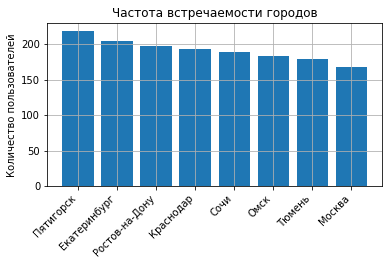

In [18]:
# сохраним данные из 'df_users_city_sorted' в отдельные переменные
# название города
localities = df_users_city_sorted.index
# значение с количеством пользователей
counts = df_users_city_sorted['user_id'].sort_values(ascending=False)
# построим столбчатую диаграмму
plt.figure(figsize=(6, 3))
plt.bar(localities, counts)
# укажем наименования
plt.ylabel('Количество пользователей')
plt.title('Частота встречаемости городов')
# повернем метки по оси X на 45 градусов
plt.xticks(rotation=45, ha="right")
# линия сетки на графике
plt.grid(True)
# выведем диаграмму
plt.show()

**Вывод:**

Среди восьми городов, где представлен сервис аренды самокатов GoFast, наиболее часто встречается Пятигорск. Вместе с тем, наименее часто по сравнению с остальными городами встречается Москва. Вероятно в столице представлен более широкий выбор поставщиков сервиса по аренде самокатов.

##### Соотношение пользователей с подпиской и без подписки

,subscription_type,user_id
0,free,835
1,ultra,699


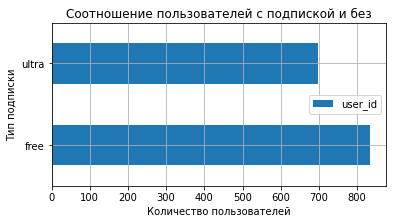

In [19]:
# создадим сводную таблицу и оценим соотношение пользователей с подпиской и без
df_users_subs_pivot = df_users.pivot_table(index='subscription_type', values='user_id', aggfunc='count').reset_index()
display(df_users_subs_pivot)
# построим столбчатую диаграмму
df_users_subs_pivot.plot(x='subscription_type', kind='barh', figsize=(6, 3), grid=True)
# укажем наименование и метки
plt.title('Соотношение пользователей с подпиской и без')
plt.xlabel('Количество пользователей')
plt.ylabel('Тип подписки')
# выведем диаграмму
plt.show()

График показывает, что по типу подписки большинство составляют пользователи без абонентской платы (free).

##### Возраст пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


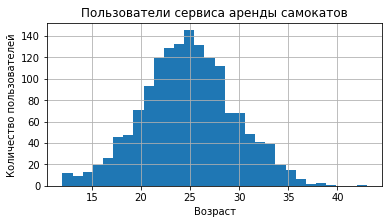

In [20]:
# рассмотрим данные по столбцу 'age'
print(df_users['age'].describe())
# построим гистограмму
df_users['age'].plot(kind='hist', figsize=(6, 3), bins=30, grid=True)
# укажем наименование и метки
plt.title('Пользователи сервиса аренды самокатов')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
# выведем гистограмму
plt.show()

Заметные на гистограмме особенности распределения также отражены и в числовом описании данных. 
- Возраст пользователей сервиса аренды самокатов в выборке находится в пределах 12 (min) и 43 (max) лет. 
- Средний показатель составляет около 25 лет, что согласуется со значением медианы. 
- В целом форма графика показывает, что крайние значения встречаются довольно редко.

##### Расстояние, которое пользователь преодолел за одну поездку

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


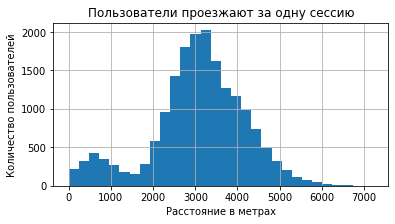

In [21]:
# рассмотрим данные по столбцу 'distance'
print(df_rides['distance'].describe())
# построим гистограмму
df_rides['distance'].plot(kind='hist', figsize=(6, 3), bins=30, grid=True)
# укажем наименование и метки
plt.title('Пользователи проезжают за одну сессию')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
# выведем гистограмму
plt.show()

График показывает, что чаще всего за одну поездку пользователи сервиса аренды самокатов преодолевают расстояние в три километра (mean 3070). Самые дальние расстояния отмечаются в районе семи километров (max 7211). При этом крайние значения встречаются очень редко.

##### Продолжительность поездок

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


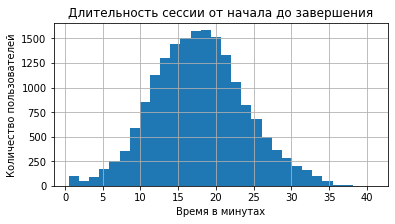

In [22]:
# рассмотрим данные по столбцу 'duration'
print(df_rides['duration'].describe())
# построим гистограмму
df_rides['duration'].plot(kind='hist', figsize=(6, 3), bins=30, grid=True)
# укажем наименование и метки
plt.title('Длительность сессии от начала до завершения')
plt.xlabel('Время в минутах')
plt.ylabel('Количество пользователей')
# выведем гистограмму
plt.show()

Согласно гистограмме продолжительность сессии — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку», представлено следующими значениями: 
- В среднем 17.8 минут (mean).
- Максимальная продолжительность отмечается значением 40.8 (max).
- Минимальные значения представлены 30 секундами (min). Рассмотрим эти значения более детально.

In [23]:
# найдём поездки с минимальными значениями в столбце 
# отсортируем таблицу по возрастанию и выведем первые 10 строк
df_rides.sort_values('duration').head(10)

,user_id,distance,duration,date,month
12013,1102,4602.122401,0.5,2021-08-01,8
17314,1483,4445.481070,0.5,2021-03-06,3
15029,1318,5894.633314,0.5,2021-03-28,3
7437,766,4539.088310,0.5,2021-12-22,12
12967,1172,4907.140751,0.5,2021-12-19,12
15015,1317,4593.389022,0.5,2021-07-16,7
13012,1176,4935.071045,0.5,2021-05-14,5
7508,772,4718.820996,0.5,2021-05-22,5
16589,1428,5059.187375,0.5,2021-05-06,5
9049,890,4848.485014,0.5,2021-11-20,11


Вызывает сомнения реалистичность данных в плане соотношения продолжительности поездок и расстояния. Неправдоподобным выглядит возможность преодолеть расстояние более 5 километров за 30 секунд на самокате.

Нетипично маленькие значения продолжительности поездок признаем аномальными и избавимся от них. Во-первых, их немного. Во-вторых, вероятно, это те поездки, которые по какой-то причине не состоялись, значит, данное условие не входит в фокус нашего исследования.

Примем нижнюю границу в пять минут. Это представляется вполне разумным. Если отбросить значения меньше пяти минут, много данных не потеряется.

Однако прежде чем избавиться от значений, оценим сколько процентов данных может быть потеряно.

In [24]:
# посчитаем общее число строк в df_rides
original_df = len(df_rides)

In [25]:
# отфильтруем данные согласно условиям и сохраним их в filtered_df 
filtered_df = df_rides.query('duration >= 3.0')

In [26]:
# посчитаем общее число строк в filtered_df
good_rows = len(filtered_df)

In [27]:
# вычислим число удаленных строк
removed_rows = original_df - good_rows

In [28]:
# рассчитаем процент потерь
percentage_removed = (removed_rows / original_df) * 100

# выведем результат
print(f"Процент отброшенных аномальных значений: {percentage_removed:.2f}%")

Процент отброшенных аномальных значений: 0.71%


Потери составляют не более 10%, поэтому смело избавляяемся от аномальных значений.

In [29]:
# фильтруем датафрейм при помощи логической индексации
df_rides = df_rides[df_rides['duration'] >= 3.0]

count    17940.000000
mean        17.924702
std          5.944528
min          3.006979
25%         13.697516
50%         17.728310
75%         21.750785
max         40.823963
Name: duration, dtype: float64


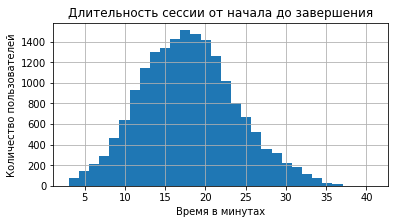

In [30]:
# рассмотрим данные по столбцу 'duration' после фильтрации
print(df_rides['duration'].describe())
# построим гистограмму
df_rides['duration'].plot(kind='hist', figsize=(6, 3), bins=30, grid=True)
# укажем наименование и метки
plt.title('Длительность сессии от начала до завершения')
plt.xlabel('Время в минутах')
plt.ylabel('Количество пользователей')
# выведем гистограмму
plt.show()

Все данные сохранены. В числовом описании можно заметить, что среднее и медиана немного изменились, но разница между ними соответствует тем же пределам. Минимальная продолжительность поездок отмечается значением 3.0 (min).

#### Шаг 4. Объединение данных

Для дальнейшего анализа параметров, которые относятся к разным датафреймам, объединим данные о пользователях, поездках и подписках в один датафрейм.

In [31]:
# методом merge() объединим строки датафреймов по совпадающим значениям столбца user_id
df_merged = df_users.merge(df_rides, on='user_id', how='left')
df_merged = df_merged.merge(df_subs, on='subscription_type', how='left')

In [32]:
# вызовем функцию data_info()
data_info(df_merged)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17940 entries, 0 to 17939
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17940 non-null  int64         
 1   name               17940 non-null  object        
 2   age                17940 non-null  int64         
 3   city               17940 non-null  object        
 4   subscription_type  17940 non-null  object        
 5   distance           17940 non-null  float64       
 6   duration           17940 non-null  float64       
 7   date               17940 non-null  datetime64[ns]
 8   month              17940 non-null  int64         
 9   minute_price       17940 non-null  int64         
 10  start_ride_price   17940 non-null  int64         
 11  subscription_fee   17940 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Итак, столбцы всех трёх датафреймов теперь хранятся в одной таблице.

##### Создание датафреймов различных по типу подписки

Теперь на основе объединённого датафрейма создадим два разных, где будут храниться:
- данные о пользователях без подписки
- данные о пользователях с подпиской

In [33]:
# создадим df_free при помощи логической индексации
df_subs_free = df_merged[df_merged['subscription_type'] == 'free']
df_subs_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [34]:
# убедимся, что после объединения в df_subs_free не возникли пропуски
print('Количество пропусков:')
print(df_subs_free.isnull().sum())

Количество пропусков:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [35]:
# убедимся, что размер объединенного df_subs_free соответствует ожидаемому
# используем атрибут shape, чтобы получить количество строк и столбцов
num_rows, num_columns = df_subs_free.shape
print(f"Количество строк: {num_rows}")
print(f"Количество столбцов: {num_columns}")

Количество строк: 11440
Количество столбцов: 12


In [36]:
# создадим df_ultra при помощи логической индексации
df_subs_ultra = df_merged[df_merged['subscription_type'] == 'ultra']
df_subs_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [37]:
# убедимся, что после объединения в df_subs_ultra не возникли пропуски
print('Количество пропусков:')
print(df_subs_ultra.isnull().sum())

Количество пропусков:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [38]:
# убедимся, что размер объединенного df_subs_ultra соответствует ожидаемому
# используем атрибут shape, чтобы получить количество строк и столбцов
num_rows, num_columns = df_subs_ultra.shape
print(f"Количество строк: {num_rows}")
print(f"Количество столбцов: {num_columns}")

Количество строк: 6500
Количество столбцов: 12


Все данные сохранены, пропущенных значений в объединённых датафреймах не обнаружено, размеры таблиц соответствуют ожидаемым.

##### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

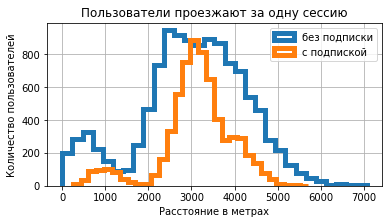

In [39]:
# построим график для расстояния, которое пользователи проезжают за одну сессию
# отобразим данные по обеим категориям
ax = df_subs_free['distance'].plot(kind='hist', figsize=(6, 3), histtype='step', bins=30, linewidth=5, label='без подписки', grid=True)
ax = df_subs_ultra['distance'].plot(kind='hist', figsize=(6, 3), histtype='step', bins=30, linewidth=5, label='с подпиской', grid=True)
# установим метки
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
plt.title('Пользователи проезжают за одну сессию')
# легенда
plt.legend()
# выведем график
plt.show()

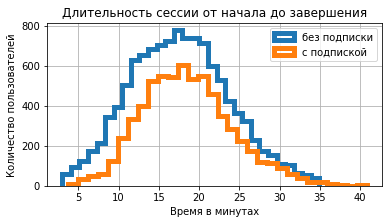

In [40]:
# построим график для продолжительности поездок
# отобразим данные по обеим категориям
ax = df_subs_free['duration'].plot(kind='hist', figsize=(6, 3), histtype='step', bins=30, linewidth=5, label='без подписки', grid=True)
ax = df_subs_ultra['duration'].plot(kind='hist', figsize=(6, 3), histtype='step', bins=30, linewidth=5, label='с подпиской', grid=True)
# установим метки
plt.xlabel('Время в минутах')
plt.ylabel('Количество пользователей')
plt.title('Длительность сессии от начала до завершения')
# легенда
plt.legend()
# выведем график
plt.show()

**Вывод:**

В целом, согласно форме графиков можно сказать, что расстояние и продолжительность поездок для пользователей обеих категорий характеризуется похожими тенденциями. Разница наблюдается в пределах крайних значений:
- Пользователи без подписки чаще склонны завершать поездки уже на первых минутах по сравнению с пользователями с подпиской.
- Среди пользователей с подпиской есть те, чья длительность сессии от начала до завершения составляет более 40 минут.
- Среди пользователей без подписки чаще встречаются любители преодолевать дальние расстояния на самокате.

#### Шаг 5. Подсчёт выручки

##### Создадим отдельный датафрейм с агрегированными данными

Новый датафрейм с агрегированными данными о поездках будет хранить следующие значения для каждого пользователя за каждый месяц:
- суммарное расстояние
- суммарное время
- количество поездок

Для подсчёта стоимости продолжительность каждой поездки в каждой строке датафрейма df_merged округлим до следующего целого числа.

In [41]:
# округлим значения в столбце duration до следующего целого числа
df_merged['duration'] = np.ceil(df_merged['duration'])
df_merged['duration'] = df_merged['duration'].astype('int')

In [42]:
# создадим df_revenue на основе объединённого ранее датафрейма df_merged
# сделаем нужные рассчеты, используя pivot_table и функции агрегирования
df_revenue = pd.pivot_table(df_merged, 
                            index=['user_id', 'month'], 
                            values=['distance', 'duration'], 
                            aggfunc={'distance': 'sum', 'duration': 'sum', 'user_id': 'count'},
                            fill_value=0)

# переименуем столбцы
df_revenue.columns = ['total_distance', 'total_duration', 'number_of_trips']

# сбрасываем индекс, чтобы user_id и month были обычными столбцами
df_revenue = df_revenue.reset_index()
df_revenue.head()

,user_id,month,total_distance,total_duration,number_of_trips
0,1,1,7027.511294,42,2
1,1,4,754.159807,7,1
2,1,8,6723.470560,46,2
3,1,10,5809.911100,32,2
4,1,11,7003.499363,56,3


##### Добавим столбец с помесячной выручкой по каждому пользователю

Для рассчета выручки по каждому пользователю обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.

In [43]:
# добавим в df_revenue нужные для рассчётов столбцы
df_revenue = df_revenue.merge(df_users, how='left', on='user_id')
df_revenue = df_revenue.merge(df_subs, how='left', on='subscription_type')
df_revenue.head()

,user_id,month,total_distance,total_duration,number_of_trips,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,42,2,Кира,22,Тюмень,ultra,6,0,199
1,1,4,754.159807,7,1,Кира,22,Тюмень,ultra,6,0,199
2,1,8,6723.470560,46,2,Кира,22,Тюмень,ultra,6,0,199
3,1,10,5809.911100,32,2,Кира,22,Тюмень,ultra,6,0,199
4,1,11,7003.499363,56,3,Кира,22,Тюмень,ultra,6,0,199


In [44]:
# рассчитаем выручку по каждому пользователю и добавим столбец с результатом в df_revenue
df_revenue['monthly_revenue'] = (df_revenue['start_ride_price'] * df_revenue['number_of_trips'] +
                                 df_revenue['minute_price'] * df_revenue['total_duration'] +
                                 df_revenue['subscription_fee'])
# выведем результат
df_revenue[['user_id', 'month', 'number_of_trips', 'monthly_revenue']]

,user_id,month,number_of_trips,monthly_revenue
0,1,1,2,451
1,1,4,1,241
2,1,8,2,475
3,1,10,2,391
4,1,11,3,535
...,...,...,...,...
11286,1534,6,2,308
11287,1534,8,2,484
11288,1534,9,1,234
11289,1534,11,4,824


**Вывод:**

- Создан отдельный датафрейм с агрегированными данными о поездках.
- Посчитаны суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- Добавлен столбец с рассчитанной помесячной выручкой, которую принёс каждый пользователь.

Далее перейдем к оценке гипотез в рамках данного исследования.

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки?

Проверим гипотезу о том, что пользователи с подпиской тратят больше времени на поездки.

*Нулевая гипотеза:* средние значения продолжительности поездки пользователей из двух групп равны.

*Альтернативная гипотеза:* среднее значение продолжительности поездки пользователей с подпиской больше, чем среднее значение продолжительности поездки пользователей без подписки.

In [45]:
# используем специальный метод ttest_ind() с указанием соответствующего аргумента для проверки альтернативной гипотезы

# для наглядной оценки выведем среднее значение для обоих датасетов
print('Среднее продолжительности поездки с подпиской:', round(df_subs_ultra['duration'].mean(), 2))
print('Среднее продолжительности поездки без подписки:', round(df_subs_free['duration'].mean(), 2))

# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results_duration = st.ttest_ind(df_subs_ultra['duration'], df_subs_free['duration'], alternative='greater')

print(f'p-value: {results_duration.pvalue}')

# проверяем p-value
if results_duration.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Среднее продолжительности поездки с подпиской: 18.54
Среднее продолжительности поездки без подписки: 17.57
p-value: 4.339260469446751e-26
Отвергаем нулевую гипотезу


**Вывод:**

Данные дают достаточное основание отвергнуть нулевую гипотезу для выбранного уровня значимости. Значит, можно сделать вывод, что пользователи с подпиской тратят больше времени на поездки.

Заметим, что даже при более строгом значении статистической значимости в 1 %, а не 5 % мы бы получили тот же результат: p-value не превышает и этого значения.

##### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимального значения с точки зрения износа самоката?

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.

Проверим гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

*Нулевая гипотеза:* средние расстояние одной поездки пользователей с подпиской равно 3130 метров.

*Альтернативная гипотеза:* средние расстояние одной поездки пользователей с подпиской больше 3130 метров.

In [46]:
# используем специальный метод ttest_1samp() для проверки односторонней гипотезы

# для наглядной оценки выведем среднее значение
print('Среднее значение:', round(df_subs_ultra['distance'].mean(), 2))

# устанавливаем проверяемое оптимальное значение
optimal_value = 3130

# задаём уровень статистической значимости
alpha = 0.05

# строит распределение со значением
results_distance = st.ttest_1samp(df_subs_ultra['distance'], optimal_value, alternative='greater')

print('p-значение:', results_distance.pvalue)

# проверяем p-value
if results_distance.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее значение: 3115.45
p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Вероятность относительно высока — данные не дают основания отвергнуть это предположение.
По-видимому, пользователи с подпиской действительно проезжают за одну поездку не более 3130 метров, что подтверждается и средним значением.

##### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Проверим гипотезу о том, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

*Нулевая гипотеза:* средние значения помесячной выручки пользователей из двух групп равны.

*Альтернативная гипотеза:* среднее значение помесячной выручки пользователей с подпиской выше, чем среднее значение помесячной выручки пользователей без подписки.

In [47]:
# создадим датасеты с выборками для сравнения
df_revenue_ultra = df_revenue[df_revenue['subscription_type'] == 'ultra']
df_revenue_free = df_revenue[df_revenue['subscription_type'] == 'free']

# для наглядной оценки выведем среднее значение для обоих датасетов
print('Среднее помесячной выручки с подпиской:', round(df_revenue_ultra['monthly_revenue'].mean(), 2))
print('Среднее помесячной выручки без подписки:', round(df_revenue_free['monthly_revenue'].mean(), 2))

# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results_revenue = st.ttest_ind(df_revenue_ultra['monthly_revenue'], df_revenue_free['monthly_revenue'], alternative='greater')

print(f'p-value: {results_revenue.pvalue}')

# проверяем p-value
if results_revenue.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Среднее помесячной выручки с подпиской: 362.79
Среднее помесячной выручки без подписки: 329.41
p-value: 2.533717465453254e-30
Отвергаем нулевую гипотезу


**Вывод:**

Согласно данным есть основания говорить, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. По всей видимости, пользователи с подпиской могут быть «выгоднее» для компании.

##### Теоретический кейс

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:**

В данном случае выборки будут зависимыми, или — парными. Парная выборка означает, что некоторая переменная измеряется дважды для одних и тех же объектов. В данном примере это пара измерений для каждого пользователя — до и после обновлений серверов.

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, используется метод `scipy.stats.ttest_rel()`

#### Шаг 7. Распределения (необязательное задание)

##### Какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %?

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Необходимо выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %.

В представленном случае согласие *(успех)* или отказ *(неудача)* пользователя продлить подписку — это повторяющиеся независимые друг от друга испытания Бернулли. Значит, случайную величину можно описать `биномиальным распределением`.

Чтобы определить биномиальное распределение, нужны два параметра: количество попыток n и вероятность успеха p.

Известно, что после бесплатного пробного периода подписку продлевают 10 % пользователей, то есть вероятность успеха равна 
0.1. Тогда вероятность неудачи по схеме Бернулли равна 1 − 0.1 = 0.9.

Так как в рамках акции как минимум 100 существующих клиентов должны продлить подписку, а по опыту проведения такой акции известно, что это 10 % пользователей, то допустим, отдел раздаёт 1000 промокодов, то есть n=1000.

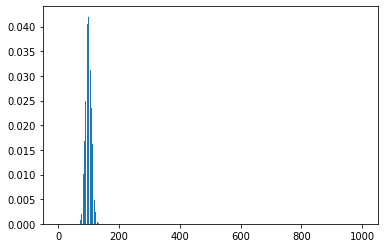

In [48]:
# построим график биномиального распределения
n = 1000 # количество попыток
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k) 
    distr.append(prob)
    
plt.bar(range(0, n + 1), distr)
None

График симметричный. Он показывает, что при вероятности успеха *(p)*, равной 1 %, и 1000 попытках *(n)* вероятность, что случится 100 успехов, довольно высока.

Далее, чтобы найти минимальное количество промокодов, будем использовать кумулятивную функцию распределения (CDF) для биномиального распределения.

В нашем случае нужно найти такое число *n*, чтобы вероятность получить меньше 100 купонов составляла 0.05.

In [49]:
# рассчитаем кумулятивную функцию распределения (CDF) непосредственно для каждого значения n
# переберём значения n в указанном диапазоне, чтобы определить, 
# меньше ли совокупная вероятность получения 99 или менее успехов (выполнения плана) при 0,05 

for n in range (500, 1500):
    if binom.cdf(99, n, p) < 0.05:
        print("Минимальное количество промокодов:", n)
        break

Минимальное количество промокодов: 1161


**Вывод:**

Чтобы вероятность не выполнить план была примерно 5 %, минимальное количество промокодов, которое нужно разослать составляет 1161.

##### Оценить вероятность того, что уведомление откроют не более заявленного числа пользователей

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. 

Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. 

1. С помощью аппроксимации построим примерный график распределения.
2. Оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

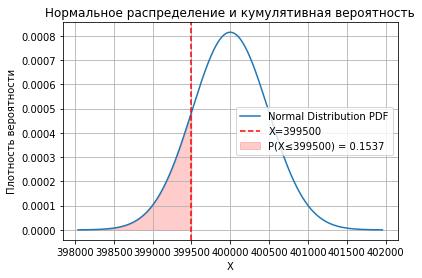

P(X≤399500) = 0.1537


In [50]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma)
# зададим набор значений биномиальной величины на выбранном промежутке
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

# рисуем график нормального распределения
plt.plot(x, distr.pdf(x), label="Normal Distribution PDF")

# вычисляем кумулятивную вероятность (CDF) для конкретного значения
value = 399500
probability = distr.cdf(value)

# отмечаем точку на кривой распределения
plt.axvline(value, color='red', linestyle='--', label=f'X={value}')
plt.fill_between(x, 0, distr.pdf(x), where=(x <= value), alpha=0.2, color='red', label=f'P(X≤{value}) = {probability:.4f}')
plt.legend()
plt.xlabel('X')
plt.ylabel('Плотность вероятности')
plt.title('Нормальное распределение и кумулятивная вероятность')
plt.grid(True)
plt.show()

print(f'P(X≤{value}) = {probability:.4f}')

**Вывод:**

Построен график нормального распределения и отмечена кумулятивная вероятность для данного значения.

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составляет чуть более 15 %.

#### Общий вывод

На данных сервиса аренды самокатов GoFast было проведено исследование с **целью** проверки предположений. Результаты анализа будут учитываться при реализации дальнейших стратегий развития бизнеса. В частности, расширение аудотории пользователей с подпиской.

Работа включала предварительный этап и собственно исследование.

На **предварительном этапе** мы изучили основную информацию о трёх датафреймах, определили количество и тип данных в таблицах, проверили столбцы на наличие пропущенных значений, преобразовали тип значений в нужных столбцах, избавились от дубликатов и убедились, что все данные готовы к более подробному исследовательскому анализу. 

Исследование предполагало анализ информации о пользователях, их поездках и подписках. В частности, были изучены данные о двух группах пользователей сервиса аренды самокатов:
- пользователи без подписки 
- пользователи с подпиской

На **этапе иследования** мы провели анализ данных с использованием релевантных методов и подходов, что позволило в некоторой степени оценить интересующие бизнес предположения. 

**1) Тратят ли пользователи с подпиской больше времени на поездки?** 

По результатам проверки односторонней гипотезы для средних двух генеральных совокупностей, представленных двумя выборками, были получены значения *(p-value)*, которые дают достаточное основание отвергнуть нулевую гипотезу о равенстве средних значений двух совокупностей для выбранного уровня значимости *(5 %)*. Следовательно, можно сделать вывод, что пользователи с подпиской тратят больше времени на поездки.

**2) Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимального значения с точки зрения износа самоката?** 

По результатам проверки двусторонный гипотезы для среднего генеральной совокупности, представленной одной выборкой, были получены значения *(p-value)*, которые не дают достаточное основание отвергнуть предположение о равенстве среднего генеральной совокупности числу для выбранного уровня значимости *(5 %)*. По-видимому, пользователи с подпиской действительно проезжают за одну поездку не более оптимального значения с точки зрения износа самоката — 3130 метров.

**3) Будет ли помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки?**

По результатам проверки односторонней гипотезы для средних двух генеральных совокупностей, представленных двумя выборками, были получены значения *(p-value)*, которые дают достаточное основание отвергнуть нулевую гипотезу о равенстве средних значений двух совокупностей для выбранного уровня значимости *(5 %)*. Значит, есть основания говорить, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. По всей видимости, пользователи с подпиской могут быть «выгоднее» для компании.

**4) Какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план отдела маркетинга была примерно 5 %?**

В представленном кейсе согласие или отказ пользователя продлить подписку по завершении периода акции — это повторяющиеся независимые друг от друга испытания Бернулли. Значит, случайную величину можно описать биномиальным распределением.

Симметричный график показал, что при вероятности успеха *(p)*, равной 1 %, и 1000 попытках *(n)* вероятность, что случится 100 успехов, довольно высока.

Результат применения кумулятивной функции *(CDF)* для биномиального распределения позволяет говорить, что минимальное количество промокодов, которое нужно разослать, чтобы вероятность не выполнить план была примерно 5 %, составляет значение 1161.

**5) Оценить вероятность того, что уведомление откроют не более заявленного числа пользователей.**

С помощью аппроксимации биномиального распределения нормальным, был построен примерный график нормального распределения и отмечена кумулятивная вероятность для указанного значения.

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составляет чуть более 15 % — *P(X≤399500) = 0.1537*.

Согласно результатам проведенного исследования можно заключить, что дальнейшие стратегии бизнеса по расширению аудотории пользователей с подпиской могут быть вполне оправданы — пользователи с подпиской «выгоднее» для компании.